# CONCEPTOS LANGGRAPH:

## STATES:

In [27]:
from typing import TypedDict

class State(TypedDict):
    customer_name: str
    my_age: int

state: State = {}
customer_name = state.get("customer_name", None)
print(f"Customer name is: {customer_name}")

Customer name is: None


## NODES:

In [28]:
def node (state: State):
    if state.get("customer_name") is None:
        return {"customer_name": "John Doe"}
    return {}

## ORQUESTATOR FLOW / AGENT:

In [29]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("node", node)

builder.add_edge(START, "node")
builder.add_edge("node", END)

agent = builder.compile()

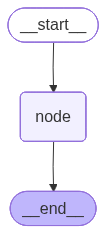

In [30]:
from IPython.display import display, Image

display(Image(agent.get_graph().draw_mermaid_png()))

## MESSAGES (HISTORY):

In [31]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

ai_msg = AIMessage(content="Hello, I am an AI")
ai_msg.text

human_msg = HumanMessage(content="Hello, I am a human")
human_msg.text

history = [human_msg, ai_msg]
for msg in history:
    msg.pretty_print()

================================ Human Message =================================

Hello, I am a human
================================== Ai Message ==================================

Hello, I am an AI
